In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

In [3]:
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Data_Master_Sheet_byDate1.xlsx', sheet_name='Sheet1')
df.head()

,exp,sample,trt_time,orient,spectra_num,details,752.901,754.044,755.187,756.329,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,20250616,Ctrl,20mins,Orth,1,0616-Ctrl-20mins-Orth,-0.004580,0.014198,0.033234,0.052258,...,0.063764,0.060871,0.058869,0.058241,0.058690,0.060554,0.064038,0.069348,0.076688,0.086265
1,20250616,Ctrl,20mins,Orth,2,0616-Ctrl-20mins-Orth,-0.002485,0.054030,0.099156,0.134131,...,0.089793,0.091843,0.094528,0.097768,0.101272,0.104856,0.108352,0.111590,0.114402,0.116619
2,20250616,Ctrl,20mins,Orth,3,0616-Ctrl-20mins-Orth,-0.006735,0.049518,0.097465,0.137848,...,0.305150,0.310110,0.314895,0.319764,0.324469,0.329269,0.334224,0.339393,0.344836,0.350614
3,20250616,Ctrl,20mins,Orth,4,0616-Ctrl-20mins-Orth,0.016831,0.032360,0.041923,0.046839,...,0.140087,0.142750,0.144948,0.146399,0.147567,0.148977,0.150814,0.153261,0.156503,0.160724
4,20250616,Ctrl,20mins,Orth,5,0616-Ctrl-20mins-Orth,-0.002913,0.041236,0.079787,0.113092,...,0.222366,0.224526,0.226351,0.227929,0.229314,0.230770,0.232435,0.234444,0.236937,0.240051


In [47]:
df[(df['orient'] == 'Para')].groupby(['sample']).mean(numeric_only=True).reset_index().to_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Para_mean_spectra.csv', index = False)

In [4]:
df_mean = df.groupby(['sample', 'trt_time', 'orient']).mean(numeric_only = True).reset_index()
df_mean.head()

,sample,trt_time,orient,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,20mins,Orth,2.025055e+07,4.900000,0.014324,0.047562,0.076111,0.100397,0.120848,...,0.135084,0.135973,0.136873,0.137851,0.138958,0.140152,0.141424,0.142772,0.144197,0.145697
1,Ctrl,20mins,Para,2.025056e+07,5.156250,0.075049,0.097825,0.116468,0.131388,0.142992,...,0.086668,0.087030,0.087352,0.087380,0.087234,0.086982,0.086689,0.086399,0.086156,0.086006
2,Ctrl,24h,Orth,2.025056e+07,4.774194,0.025840,0.052176,0.075603,0.096321,0.114533,...,0.149280,0.151817,0.154239,0.156544,0.158723,0.160747,0.162550,0.164088,0.165318,0.166195
3,Ctrl,24h,Para,2.025056e+07,4.774194,0.056913,0.079699,0.098853,0.114724,0.127659,...,0.126741,0.129312,0.131469,0.133227,0.134569,0.135645,0.136496,0.137153,0.137651,0.138021
4,Ctrl,2mins,Orth,2.025056e+07,7.181818,0.026375,0.048292,0.068571,0.087194,0.104145,...,0.116270,0.117292,0.118188,0.118877,0.119464,0.120035,0.120635,0.121299,0.122066,0.122974


In [5]:
ctrl_mean = df_mean[(df_mean['sample'] == 'Ctrl')].groupby(['orient']).mean(numeric_only = True).reset_index()
ctrl_mean.insert(0, 'sample', 'Ctrl')
ctrl_mean.insert(1, 'trt_time', '0mins')
ctrl_mean.head()

,sample,trt_time,orient,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,0mins,Orth,2.025056e+07,5.436794,0.017081,0.044847,0.069679,0.091749,0.111227,...,0.144949,0.146463,0.147858,0.149146,0.150338,0.151441,0.152449,0.153359,0.154168,0.154872
1,Ctrl,0mins,Para,2.025056e+07,4.745444,0.075169,0.095521,0.112656,0.126843,0.138351,...,0.107524,0.108182,0.108717,0.109103,0.109323,0.109538,0.109847,0.110324,0.111045,0.112085


In [6]:
df_mean1 = pd.concat([ctrl_mean, df_mean[(df_mean['sample'] != 'Ctrl')]], axis=0)

In [37]:
ctrs = [816, 857, 876, 921, 940, 970, 1003, 1033, 1062, 1100, 1127, 1167, 1207, 1245, 1270, 1321, 1344, 1381, 1426, 1451, 1636, 1663]
for c in ctrs:
    mask = (sub.columns[5:] >= c - 10) & (sub.columns[5:] <= c + 11)

    loc_idx = sub.columns[5:][mask]
    peak_idx = sub.iloc[0, 5:][mask]

    idx_max = np.argmax(peak_idx)
    peak_wl = loc_idx[idx_max]
    print(peak_wl)
  

816.457
856.837
866.874
931.002
939.773
967.062
1003.89
1032.91
1060.65
1100.87
1127.1
1165.61
1207.85
1244.55
1260.75
1320.86
1342.66
1391.72
1425.66
1449.7
1646.94
1664.05


In [ ]:
for v in xvals[pks].round(0):
        if (800 < v < 1670) and not (1500 <= v <= 1600):
            ax.axvline(v, color='gray', ls='--', lw=0.3)
            ax.text(v - 0.8, offset_step * (len(plot_df) + 0.3),
                    f'{v:.0f}', rotation=90, fontsize=6, ha='right')

In [11]:
df_mean1[(df_mean1['trt_time'].isin(['0mins', i])) & (df_mean1['orient'] == j)]

NameError: name 'i' is not defined

In [39]:
df_mean1[(df_mean1['orient'] == j)]
#['trt_time'][1]

,sample,trt_time,orient,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,0mins,Orth,2.025056e+07,5.436794,0.017081,0.044847,0.069679,0.091749,0.111227,...,0.144949,0.146463,0.147858,0.149146,0.150338,0.151441,0.152449,0.153359,0.154168,0.154872
10,Trt,20mins,Orth,2.025056e+07,4.774194,0.012439,0.043091,0.070431,0.094695,0.116115,...,0.185363,0.186407,0.187210,0.187849,0.188356,0.188859,0.189333,0.189803,0.190291,0.190820
12,Trt,24h,Orth,2.025056e+07,5.457143,0.026231,0.046581,0.066090,0.084693,0.102324,...,0.202502,0.203162,0.203317,0.202987,0.202264,0.201304,0.200237,0.199159,0.198163,0.197345
14,Trt,2mins,Orth,2.025056e+07,4.937500,0.021626,0.049500,0.074410,0.096493,0.115883,...,0.144199,0.146276,0.147999,0.149419,0.150325,0.150701,0.150864,0.150896,0.150878,0.150892
16,Trt,40mins,Orth,2.025056e+07,4.774194,0.021271,0.058766,0.090340,0.116562,0.138002,...,0.186920,0.187365,0.187595,0.187749,0.187849,0.187985,0.188237,0.188673,0.189361,0.190367
18,Trt,60mins,Orth,2.025056e+07,4.774194,0.012744,0.039686,0.064258,0.086537,0.106601,...,0.196700,0.198247,0.199470,0.200316,0.200973,0.201548,0.202076,0.202602,0.203175,0.203841
20,Trt_24h,20mins24h,Orth,2.025056e+07,5.212121,0.049757,0.074884,0.096483,0.114873,0.130372,...,0.143943,0.143724,0.143492,0.143246,0.143172,0.143162,0.143327,0.143720,0.144391,0.145391
22,Trt_24h,2mins24h,Orth,2.025056e+07,4.774194,0.026845,0.059775,0.087402,0.110242,0.128808,...,0.146770,0.148117,0.149616,0.150979,0.152262,0.153677,0.155063,0.156398,0.157657,0.158817
24,Trt_24h,40mins24h,Orth,2.025056e+07,5.161290,0.016335,0.046195,0.072607,0.095836,0.116146,...,0.171548,0.171946,0.171792,0.171392,0.170975,0.170678,0.170584,0.170807,0.171460,0.172655
26,Trt_24h,60mins24h,Orth,2.025056e+07,4.586207,0.014246,0.046853,0.075097,0.099320,0.119865,...,0.155253,0.155899,0.156656,0.157563,0.158671,0.159979,0.161426,0.163003,0.164704,0.166520


1
2
3
4
5
6
7
8
9


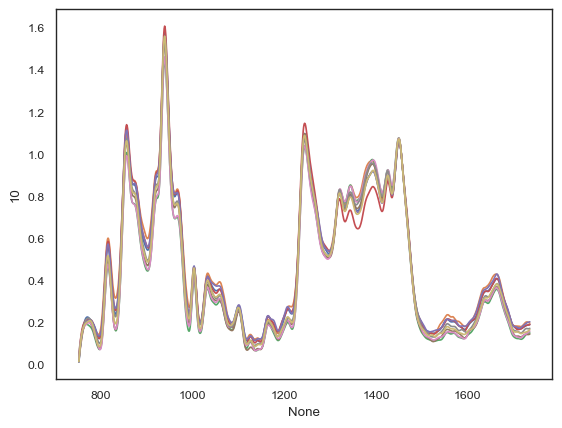

In [40]:
for b in range(1, len(df_mean1[(df_mean1['orient'] == j)])):
    print(b)
    sns.lineplot(#data= df_mean1[(df_mean1['orient'] == j)],
                x = df_mean1[(df_mean1['orient'] == j)].columns[5:],
                y = df_mean1[(df_mean1['orient'] == j)].iloc[b, 5:]
    )

In [46]:
sub.reset_index(drop=True)['trt_time']#[1]

0        0mins
1       20mins
2          24h
3        2mins
4       40mins
5       60mins
6    20mins24h
7     2mins24h
8    40mins24h
9    60mins24h
Name: trt_time, dtype: object

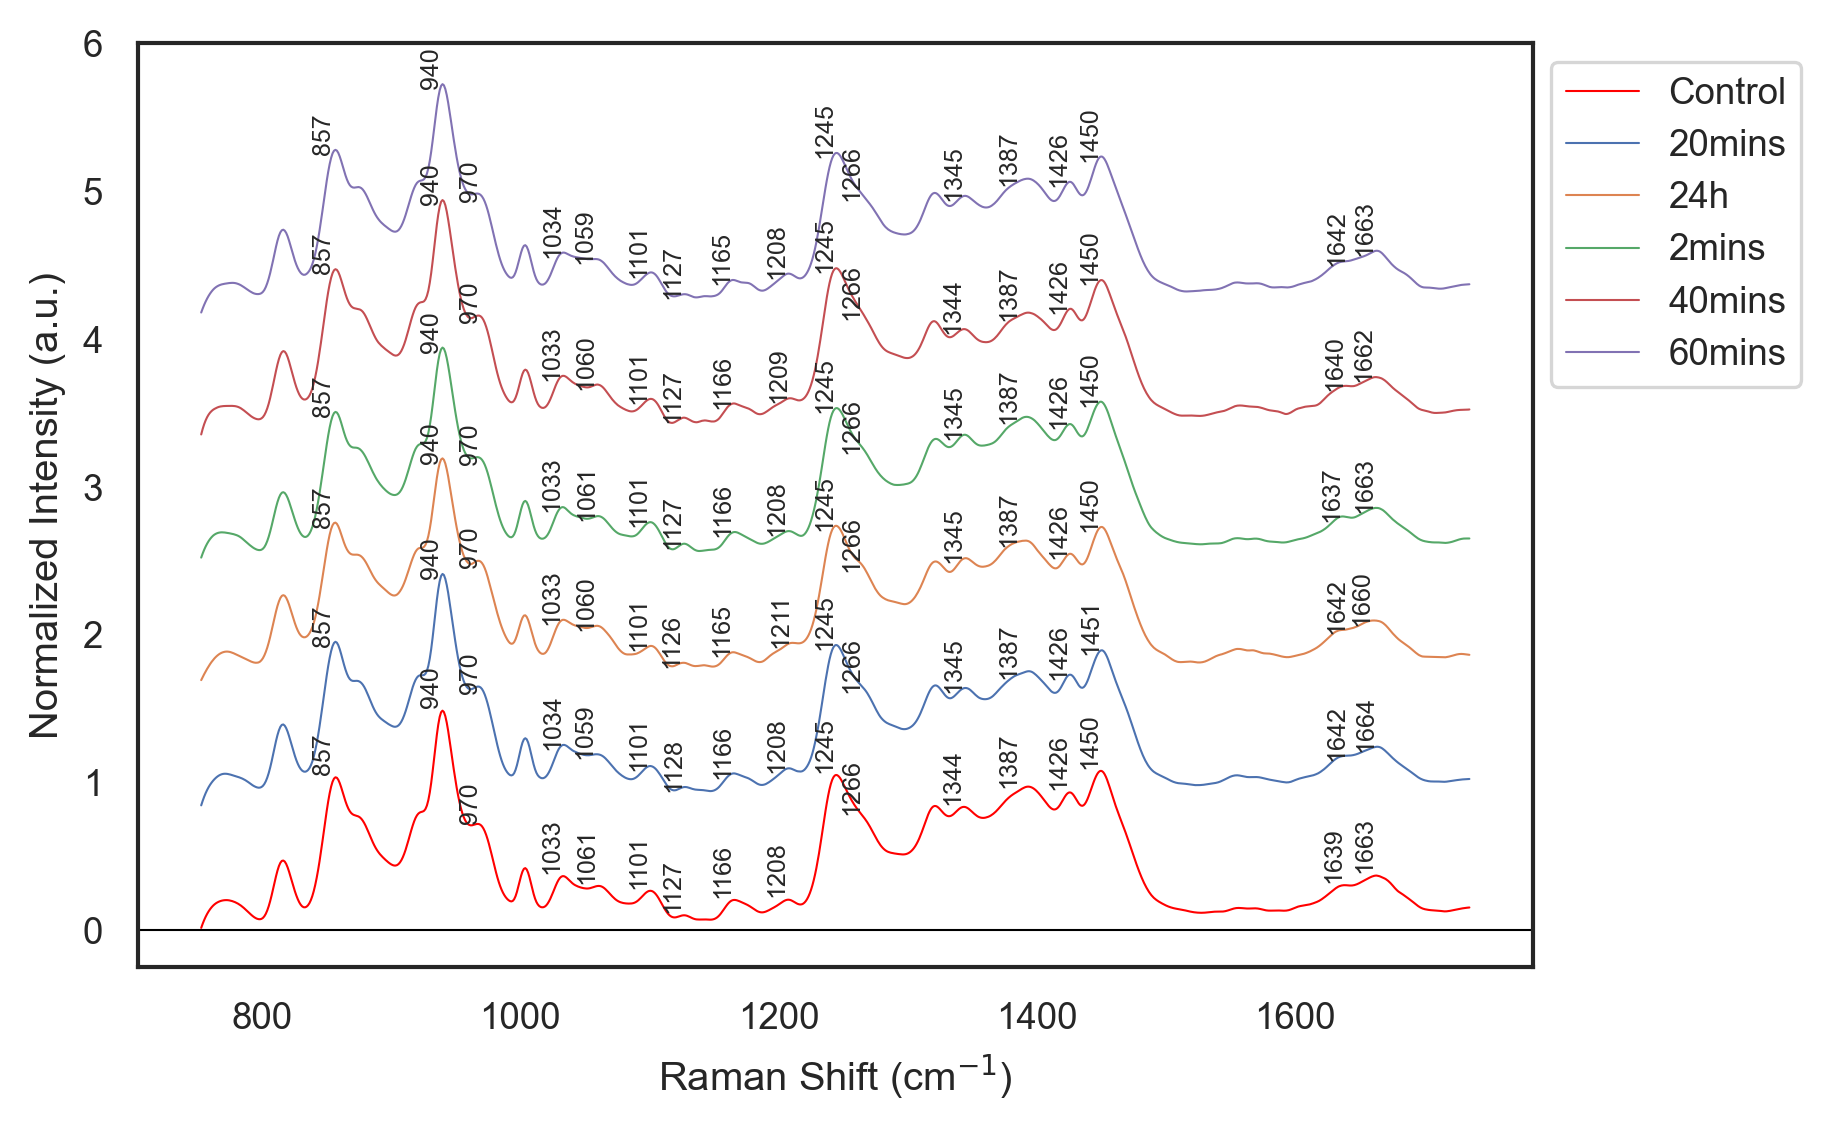

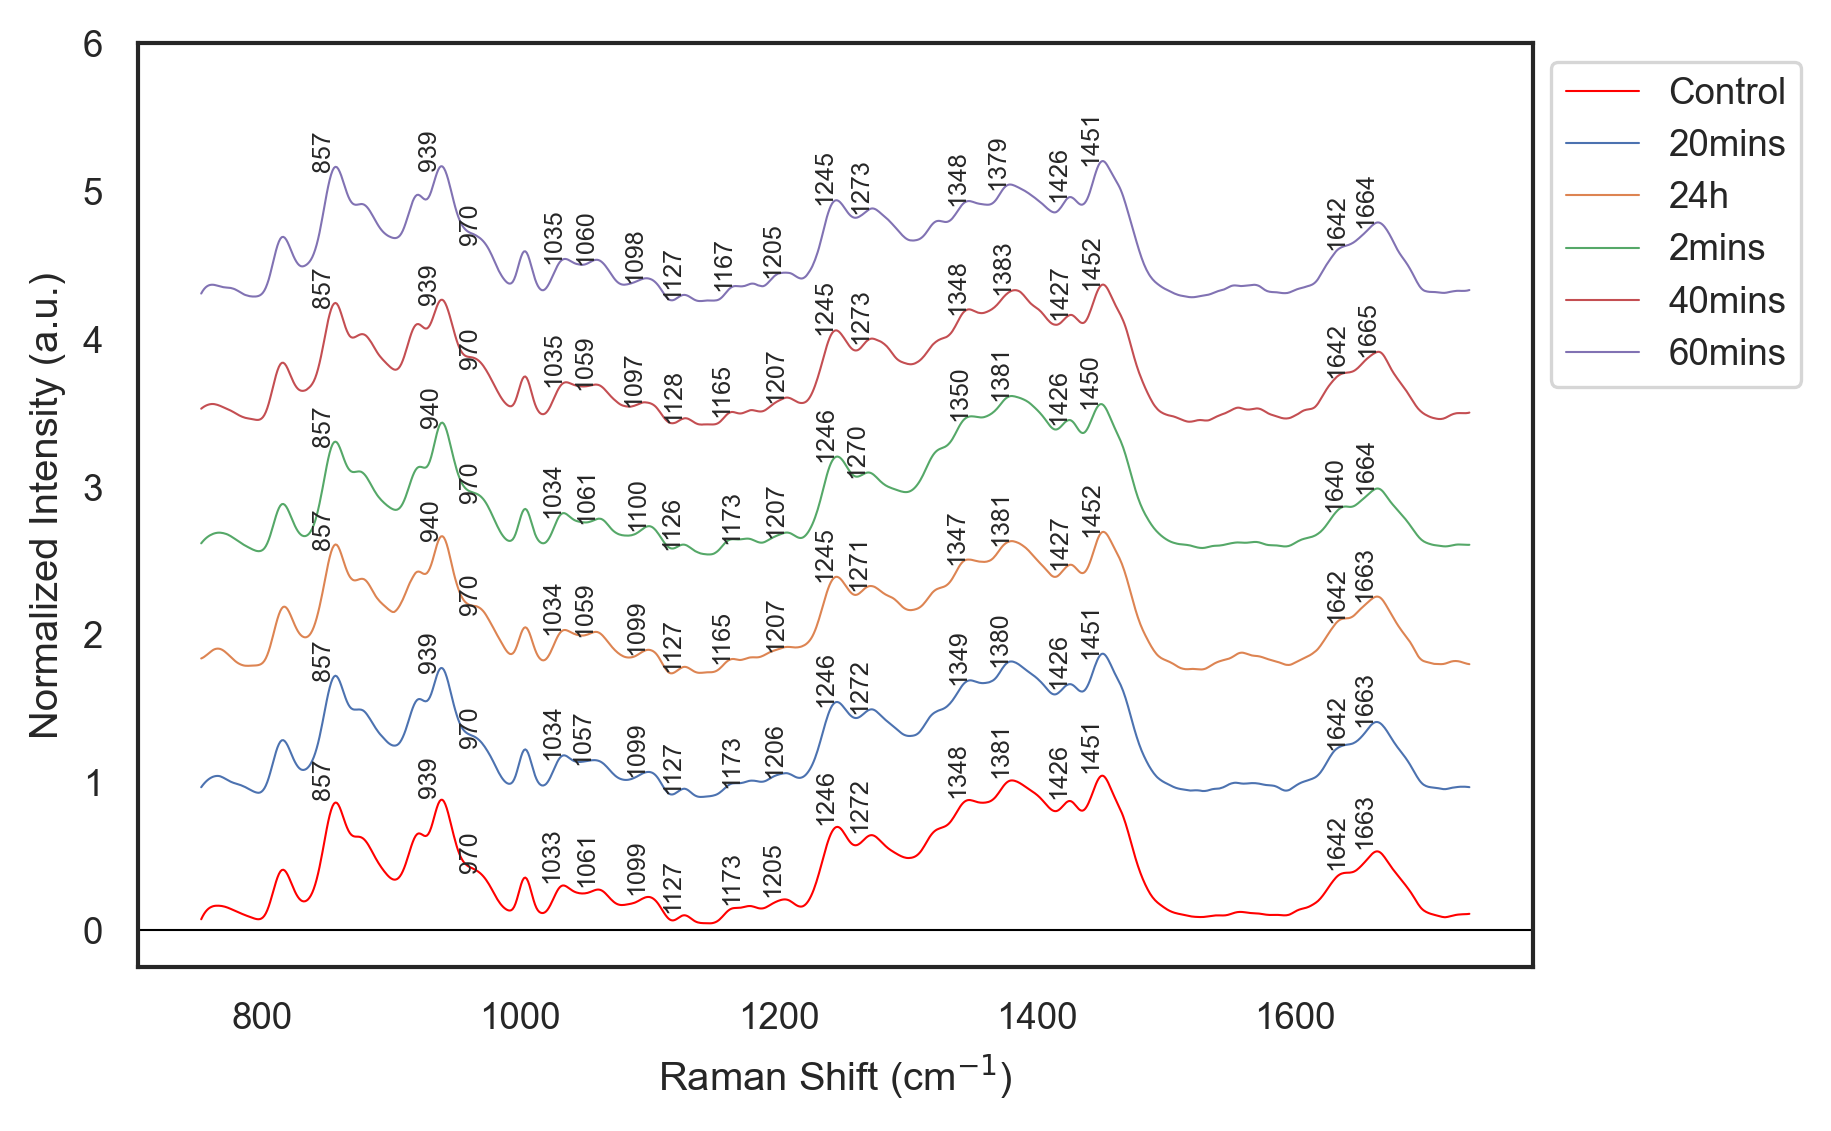

In [ ]:
### Diference from singular control

sns.set_theme(style = 'white', context = 'paper')
#for i in ['2mins', '20mins', '40mins', '60mins']:#, '24h'
for j in ['Orth', 'Para']:#
    sub = df_mean1[(df_mean1['orient'] == j)].reset_index(drop=True)
    #sub_ctrl = df_mean1[(df_mean1['sample'] == 'Ctrl') & (df_mean1['orient'] == j)]
    diff = sub.iloc[1:, 5:].values - sub.iloc[0, 5:].values

    plt.figure(figsize = (6, 4), dpi = 300)
    sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = sub.iloc[0, 5:].values,
            label = 'Control',
            color = 'red',
            lw = .5
        )
    for b in range(1, 6):
        sns.lineplot(
                x = sub.columns[5:].astype(float),
                y = sub['trt_time'].iloc[b, 5:] +(b/1.2), #.values +.35,
                label = sub[sub['trt_time']][b],
                #color = 'green',
                lw = .5,
                #hue = 'trt_time'
            )
    '''sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = diff,
            label = 'Difference',
            color = 'blue',
            lw = 1
        )'''
        #plt.title(f'Raman spectra for {j} samples at {i} treatment time')
    plt.legend(bbox_to_anchor = (1, 1))
    plt.xlabel("Raman Shift (cm$^{-1}$)")
    plt.ylabel("Normalized Intensity (a.u.)")
    plt.ylim(-.25, 6)
    plt.axhline(0, lw = .5, color = 'black')

    ctrs = [857,940, 975,1033, 1062, 1100, 1127, 1167, 1207, 1245, 1270,  1344, 1381, 1426, 1451, 1636, 1663]#816, 857, 876, 921,  1003, 1321,
    for c in ctrs:
        for b in range(0, 6):
            mask = (sub.columns[5:] >= c - 5) & (sub.columns[5:] <= c + 6)

            loc_idx = sub.columns[5:][mask]
            peak_idx = sub.iloc[b, 5:][mask]

            idx_max = np.argmax(peak_idx)
            peak_wl = loc_idx[idx_max]
            int_val = peak_idx.values[idx_max]
                    #print(int_val)
            if b == 0:
                        plt.text(peak_wl, int_val + .05,#.3 * (len(sub) + 0.3),
                        f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')
            else:
                        plt.text(peak_wl, int_val + b/1.2,#.5 * (len(sub) + 0.3),
                            f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')

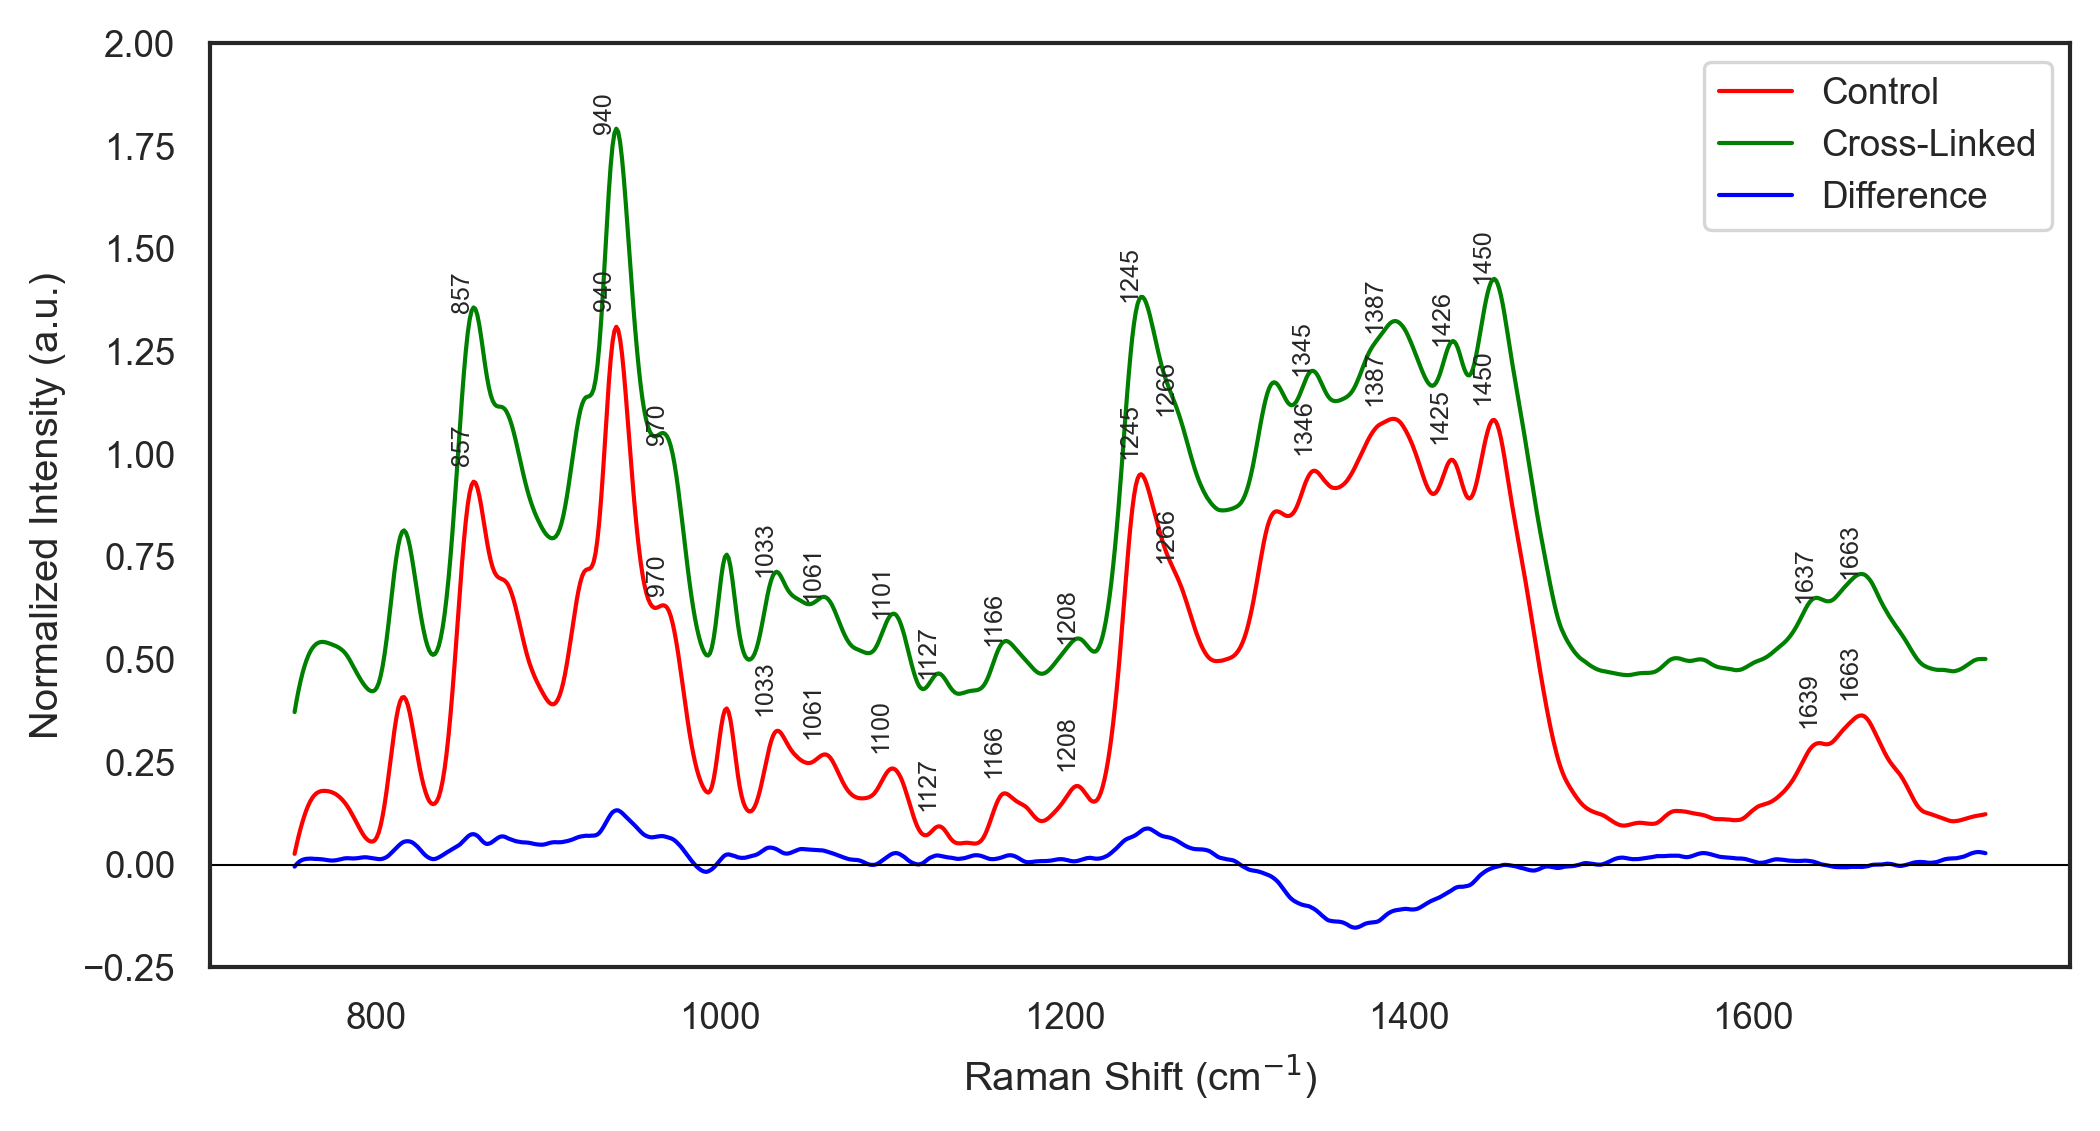

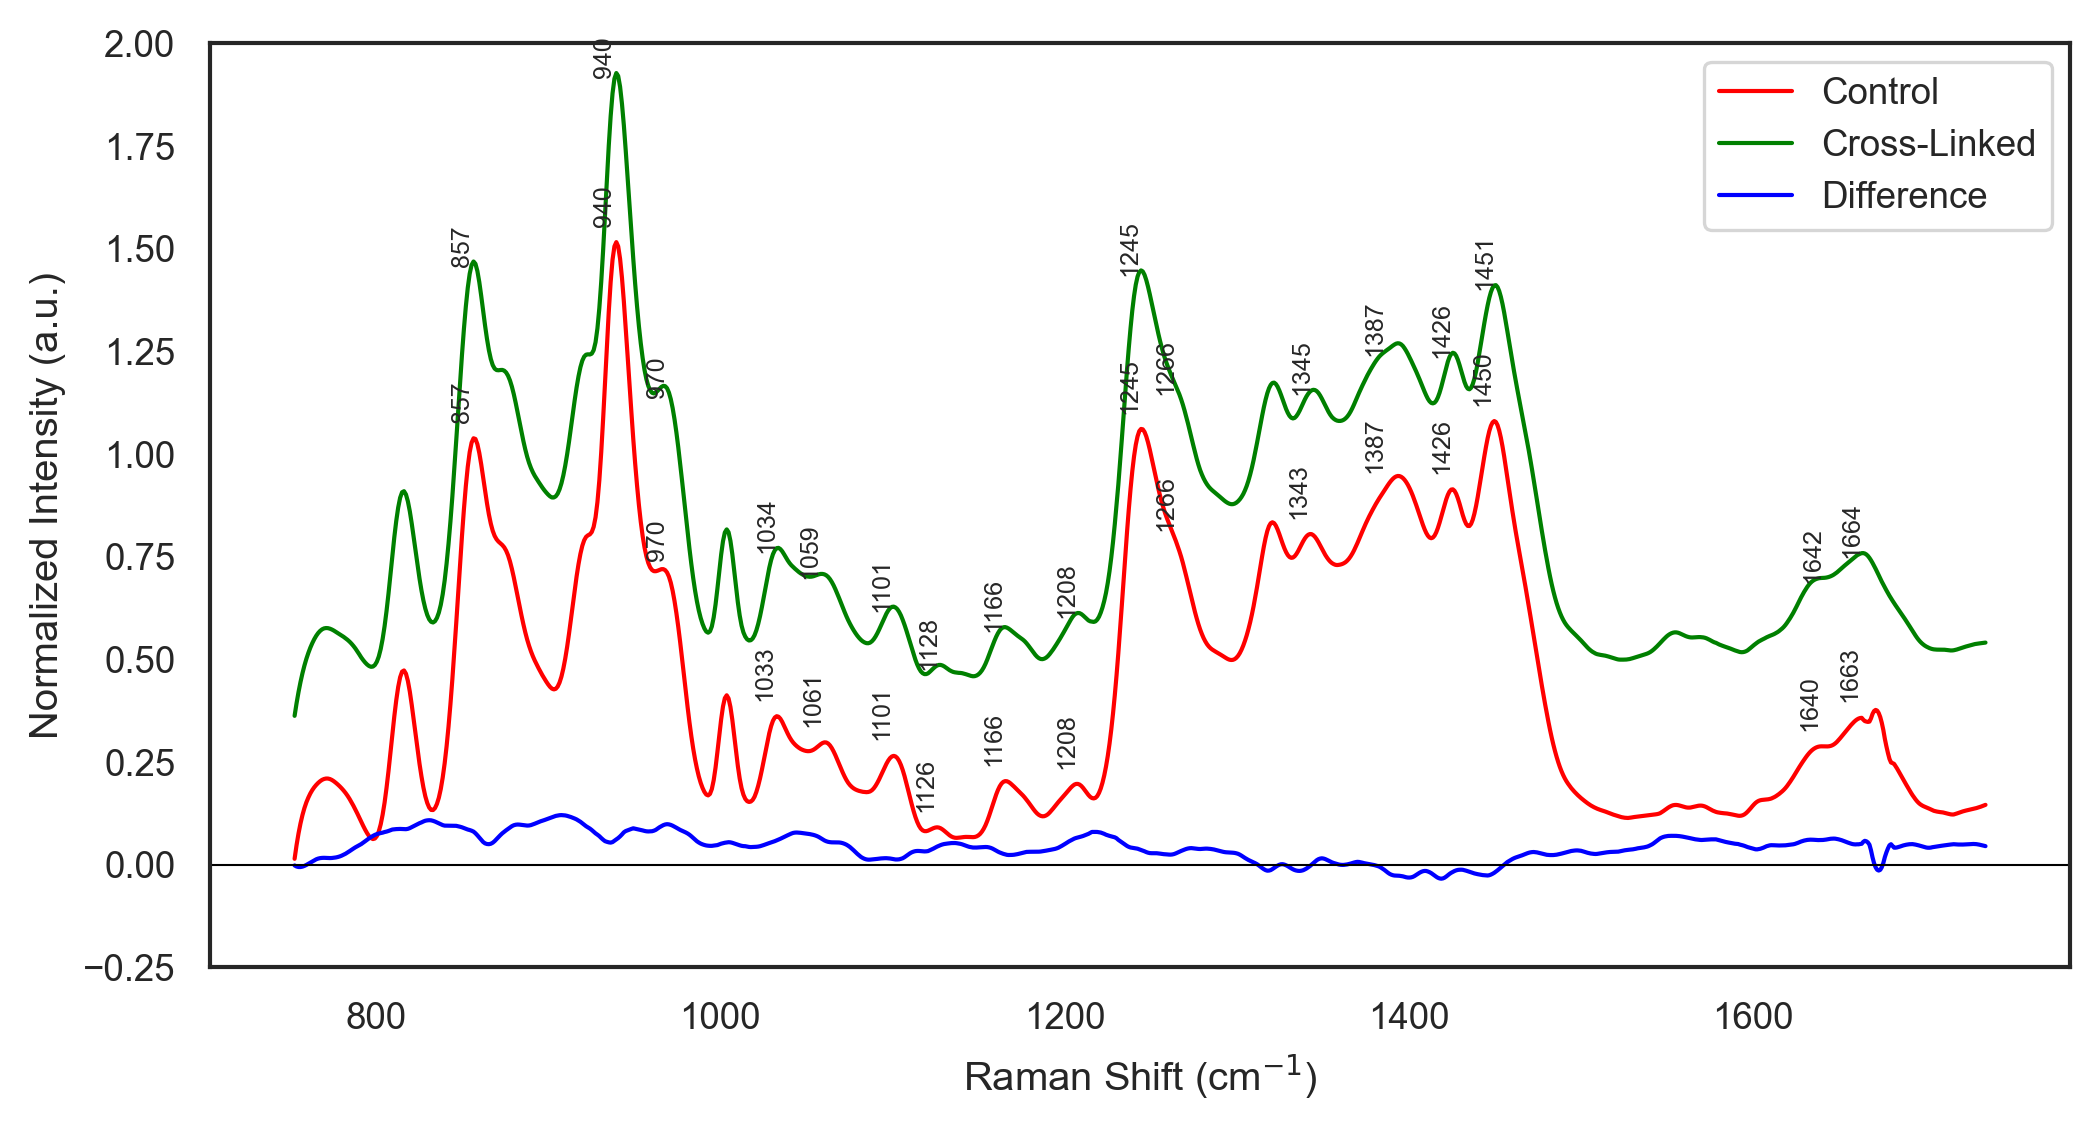

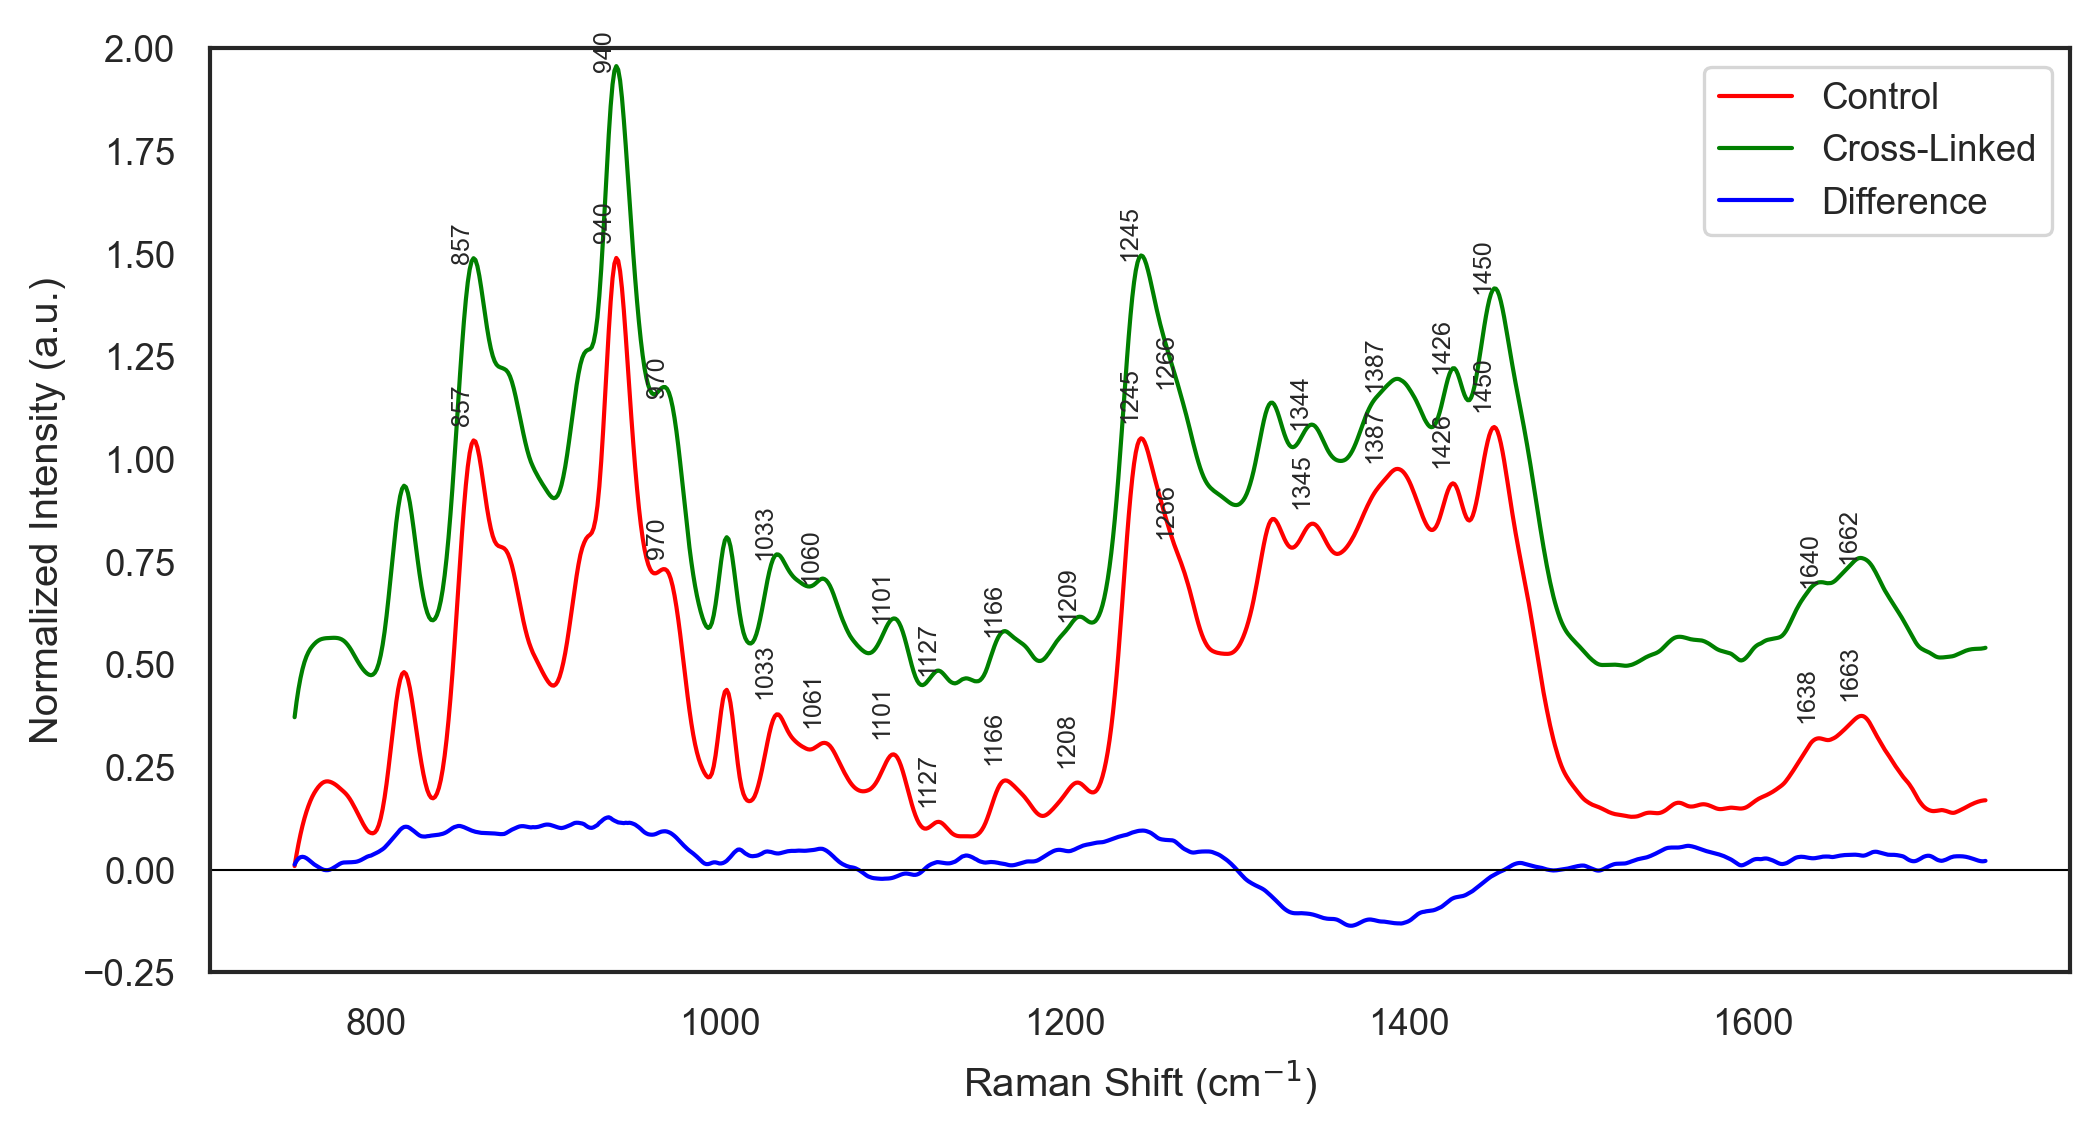

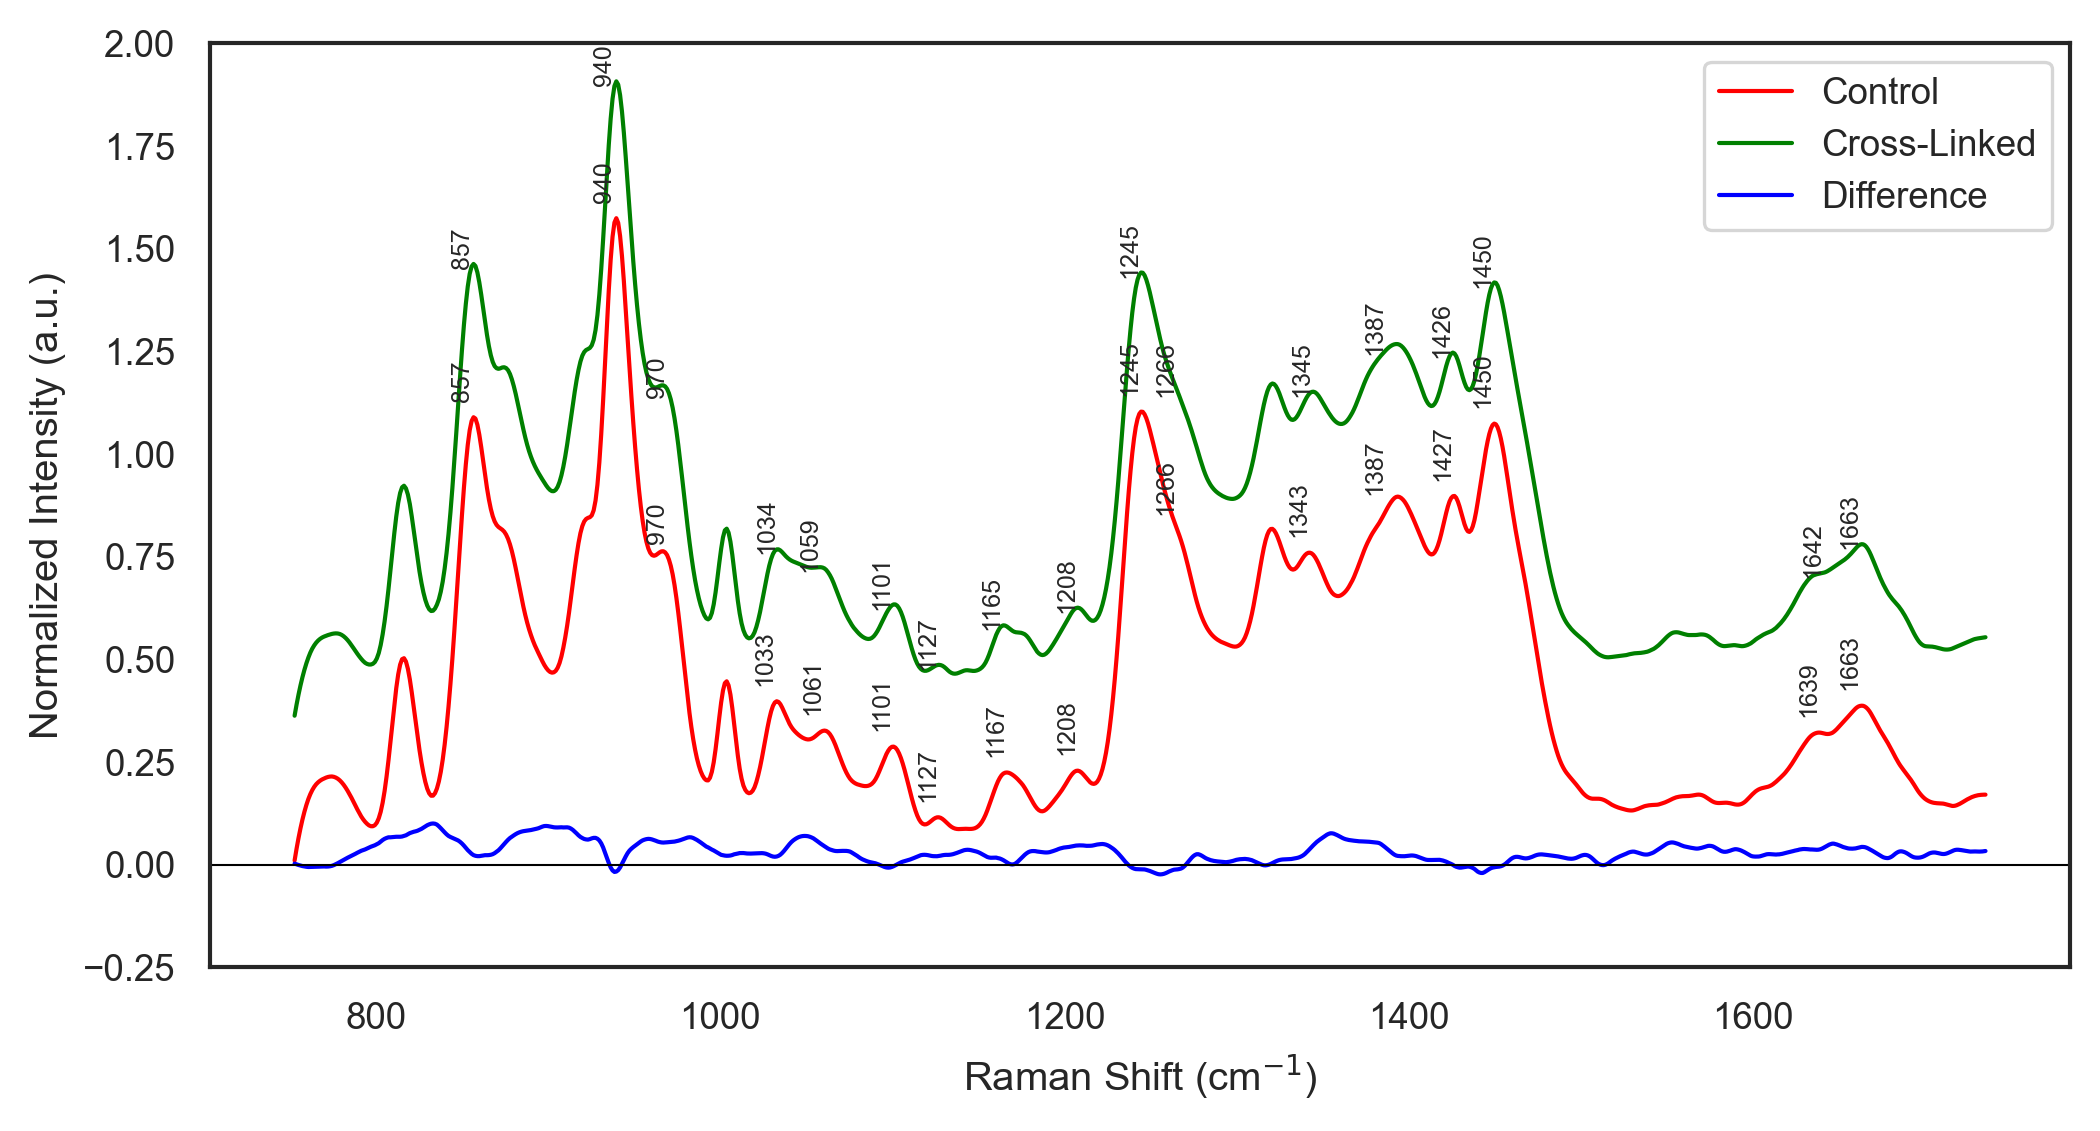

In [ ]:
### Diference within each time point

sns.set_theme(style = 'white', context = 'paper')
for i in ['2mins', '20mins', '40mins', '60mins']:#, '24h'
    for j in ['Orth', 'Para']:#
        sub = df_mean[(df_mean['trt_time'] == i) & (df_mean['orient'] == j)]
        diff = sub.iloc[1, 5:].values - sub.iloc[0, 5:].values

        plt.figure(figsize = (8, 4), dpi = 300)
        sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = sub.iloc[0, 5:].values,
            label = 'Control',
            color = 'red',
            lw = 1
        )
        sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = sub.iloc[1, 5:].values +.35,
            label = 'Cross-Linked',
            color = 'green',
            lw = 1
        )
        sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = diff,
            label = 'Difference',
            color = 'blue',
            lw = 1
        )
        #plt.title(f'Raman spectra for {j} samples at {i} treatment time')
        plt.legend(bbox_to_anchor = (1, 1))
        plt.xlabel("Raman Shift (cm$^{-1}$)")
        plt.ylabel("Normalized Intensity (a.u.)")
        plt.ylim(-.25, 2)
        plt.axhline(0, lw = .5, color = 'black')

        ctrs = [857,940, 975,1033, 1062, 1100, 1127, 1167, 1207, 1245, 1270,  1344, 1381, 1426, 1451, 1636, 1663]#816, 857, 876, 921,  1003, 1321,
        for c in ctrs:
            for b in [0, 1]:
                mask = (sub.columns[5:] >= c - 5) & (sub.columns[5:] <= c + 6)

                loc_idx = sub.columns[5:][mask]
                peak_idx = sub.iloc[b, 5:][mask]

                idx_max = np.argmax(peak_idx)
                peak_wl = loc_idx[idx_max]
                int_val = peak_idx.values[idx_max]
                #print(int_val)
                if b == 0:
                    plt.text(peak_wl, int_val + .05,#.3 * (len(sub) + 0.3),
                    f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')
                else:
                    plt.text(peak_wl, int_val + .35,#.5 * (len(sub) + 0.3),
                        f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')

In [147]:
scores = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\Para_24h_CvT24_score.csv')
scores.head()

,Label,sample,trt_time,orient,spectra_num,details,Class,Cross-validation Sets,Scores on PC 1 (16.68%),Scores on PC 2 (3.47%),Scores on PC 3 (3.34%),Scores on PC 4 (2.85%),Scores on PC 5 (2.70%),Q Residuals (70.95%),Hotelling T^2 (29.05%),Q Residuals Reduced (p=0.950) (70.95%),Hotelling T^2 Reduced (p=0.950) (29.05%),KNN Score Distance (k=3)
0,20250616,Ctrl,24h,Para,1,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 1,-0.142166,0.051021,-0.038786,0.103689,-0.021978,0.077673,5.924349,0.762352,0.465848,0.562446
1,20250616,Ctrl,24h,Para,2,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 2,-0.094782,0.064816,-0.010636,0.013321,0.049432,0.081452,2.558723,0.799443,0.201199,0.392083
2,20250616,Ctrl,24h,Para,3,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 3,-0.146891,0.045722,-0.096913,0.116949,-0.135820,0.062824,15.203511,0.616612,1.195494,0.928750
3,20250616,Ctrl,24h,Para,4,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 4,-0.122711,-0.113608,0.080634,0.004964,-0.011502,0.069529,6.163354,0.682419,0.484641,0.400347
4,20250616,Ctrl,24h,Para,5,0616-Ctrl-24h-Para,Ctrl,Leave-Out Set 5,-0.135972,0.033109,0.060663,-0.162947,0.029674,0.063365,11.330735,0.621923,0.890967,0.849635


In [148]:
scores_mean = scores.groupby(['Class']).mean(numeric_only = True)

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_16728\506242401.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_16728\506242401.py:2: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


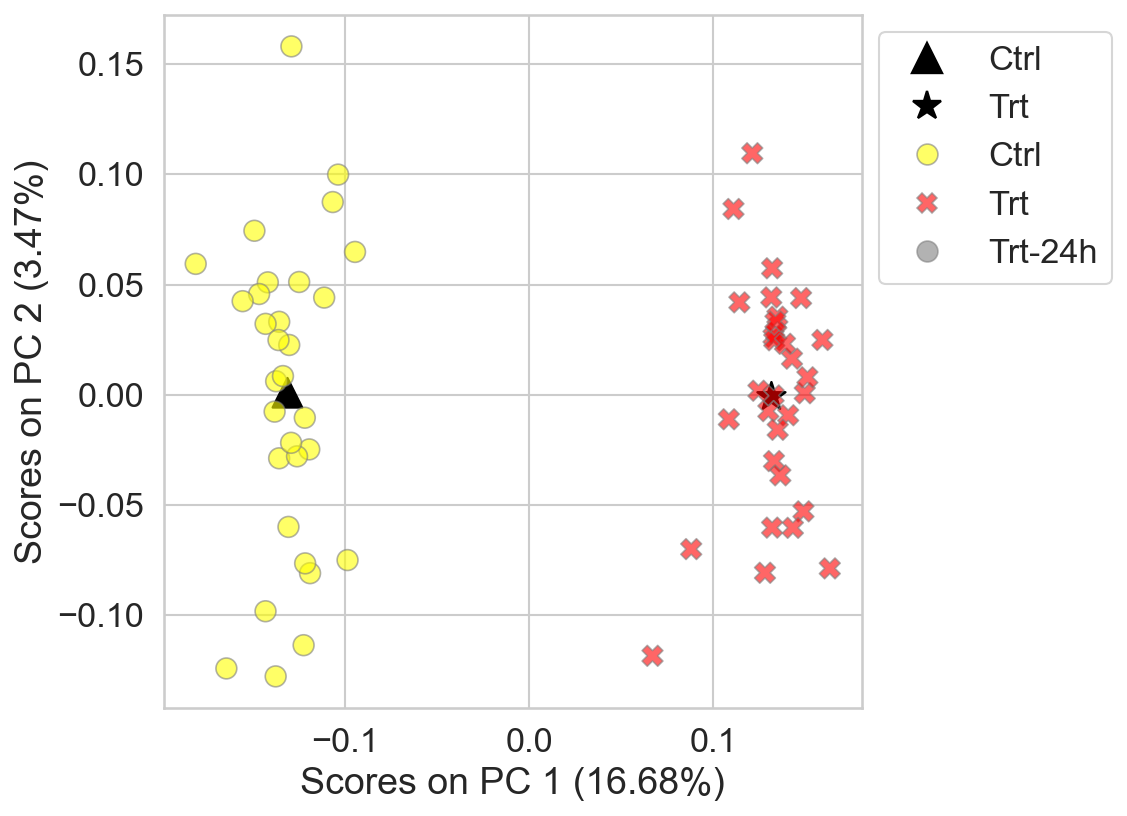

In [159]:
plt.figure(figsize = (6,6), dpi = 150)
sns.scatterplot(
    x = 'Scores on PC 1 (16.68%)',
    y = 'Scores on PC 2 (3.47%)',
    data = scores_mean,
    hue = 'Class',
    s=200,
    palette = ['black', 'black', 'gray'], #['yellow', 'red', 'gray'],
    style='Class',
    markers = ['^', '*', 'o'],
    edgecolor = 'black'
)
sns.scatterplot(
    x = 'Scores on PC 1 (16.68%)',
    y = 'Scores on PC 2 (3.47%)',
    data = scores,
    hue = 'Class',
    hue_order=['Ctrl', 'Trt', 'Trt-24h'],
    s=100,
    palette = ['yellow', 'red', 'gray'],
    style='Class',
    #markers = ['^', '*', 'o'],
    edgecolor = 'grey',
    alpha = .6
)
plt.legend(bbox_to_anchor = (1, 1))